<a href="https://colab.research.google.com/github/Ashwith19/HyperTension/blob/main/HyperTension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [35]:
df = pd.read_csv('/content/hypertension.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [36]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


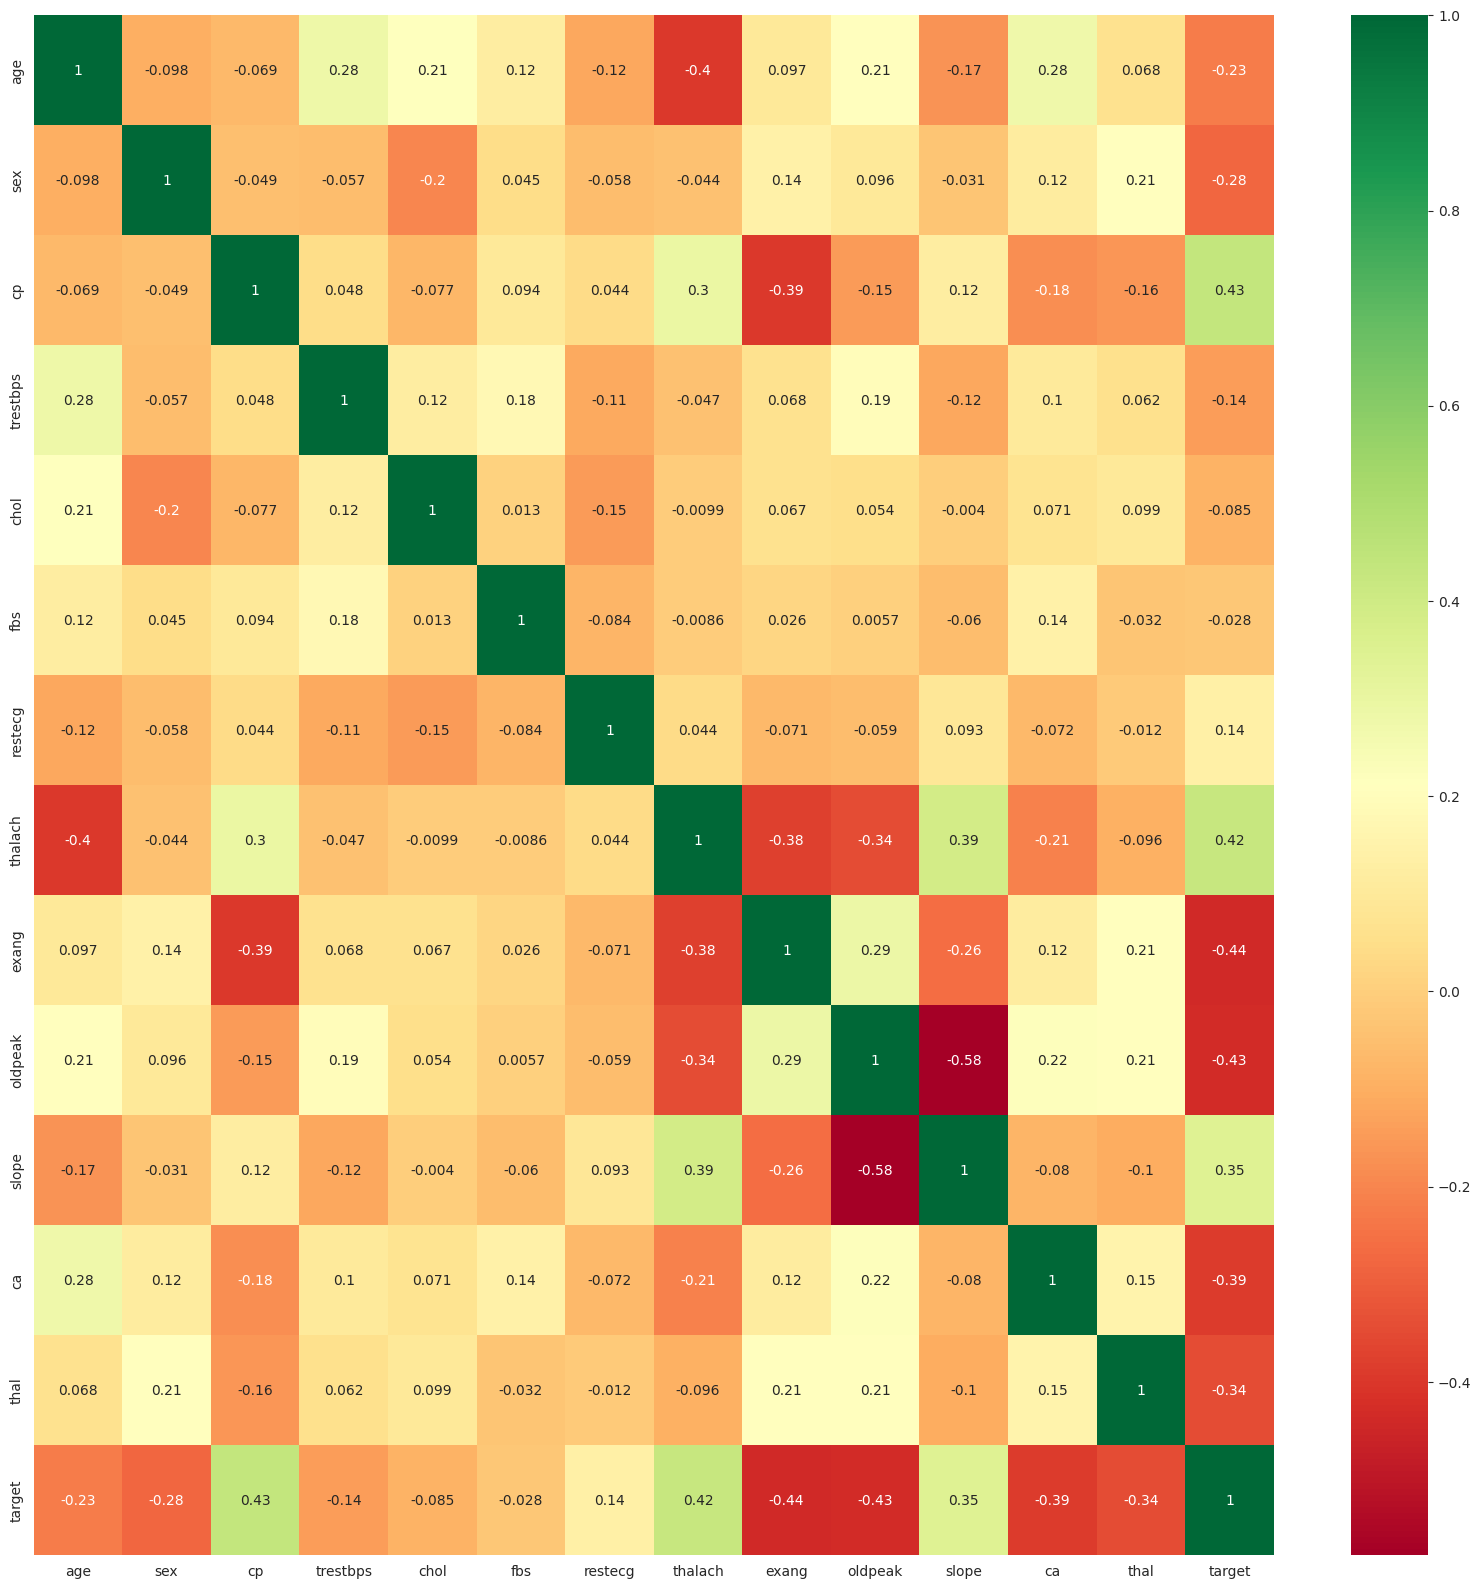

In [37]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

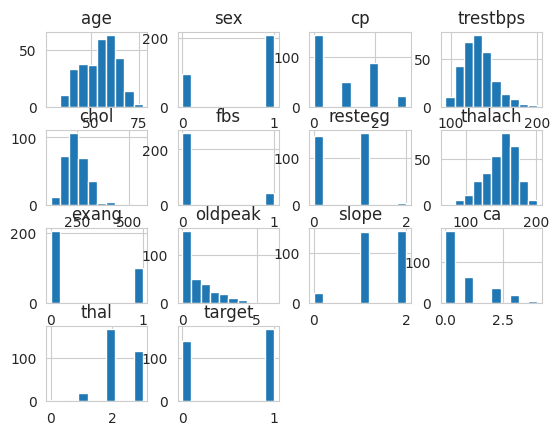

In [38]:
df.hist()

<Axes: xlabel='target', ylabel='count'>

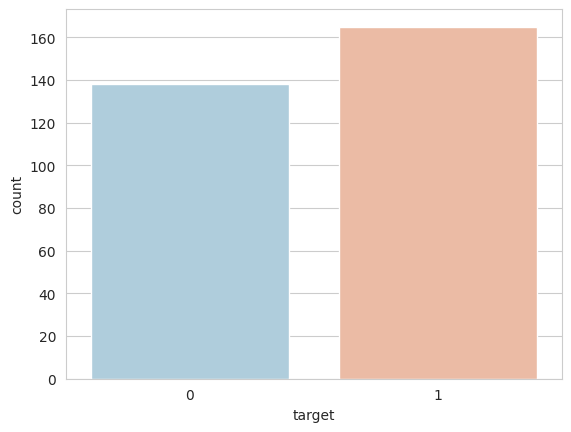

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [40]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [42]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [45]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_test.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
179,0.290464,1.049520,0.574662,-1.646316,-0.379244,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
228,0.511041,2.191778,0.806568,0.409017,-0.724323,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
111,0.290464,1.049520,-2.324160,1.021244,-0.724323,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1
246,0.180175,0.135714,3.144951,0.015443,0.742260,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
60,1.834507,-1.234996,0.362082,-0.859167,-0.896862,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0


In [58]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
    knn_scores.append(score.mean())

In [80]:
for i in range(0,len(knn_scores)):
  knn_scores[i]=round(knn_scores[i],2)


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

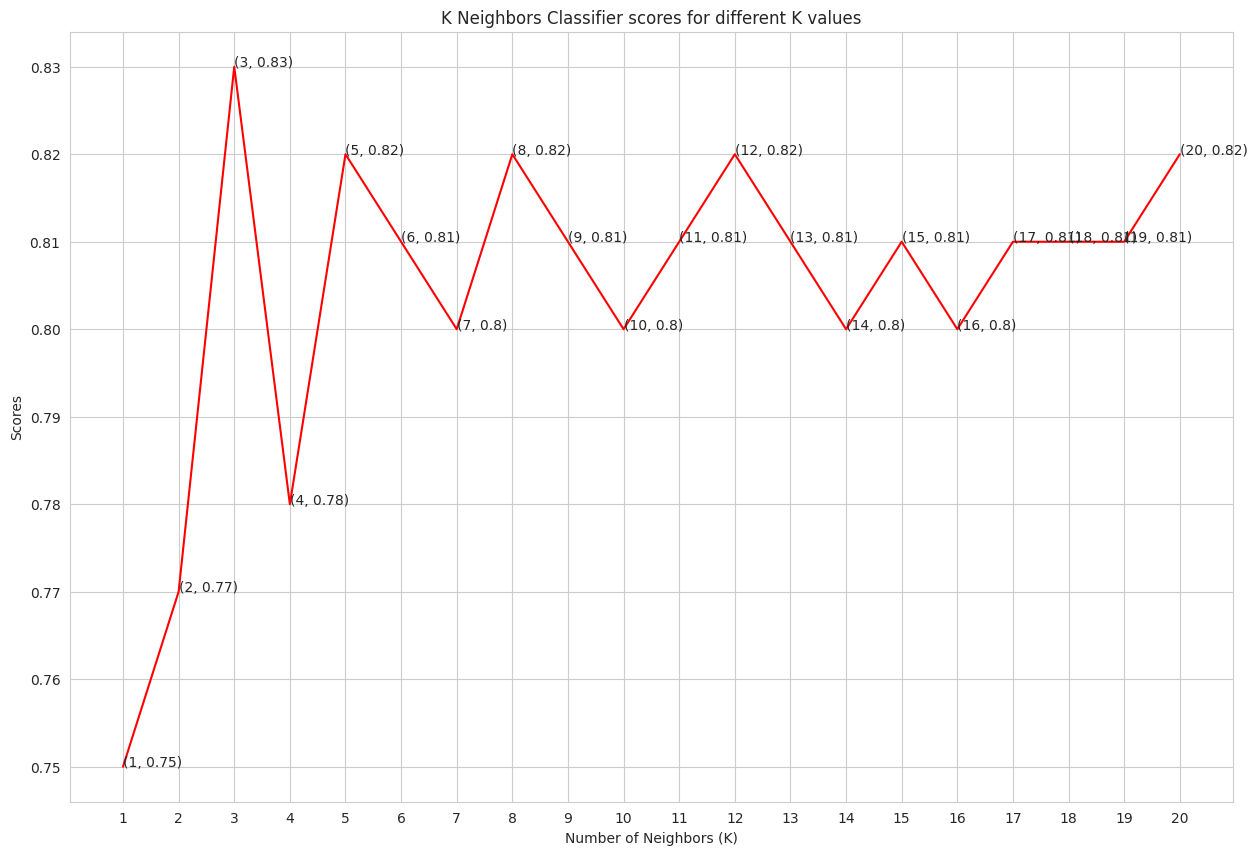

In [82]:
plt.figure(figsize=(15, 10))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [72]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
# score=cross_val_score(knn_classifier,X_train,y_train,cv=10)

In [74]:
knn_classifier.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test set
y_pr = knn_classifier.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score

# Assuming y_true and y_pred are your true labels and predicted labels, respectively
accuracy_1= accuracy_score(y_test, y_pr)
print(f'Accuracy_1: {accuracy_1}')

Accuracy_1: 0.9016393442622951


In [61]:
score.mean()

0.8225

In [50]:
# Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)

# score=cross_val_score(randomforest_classifier,X_train,y_train,cv=10)

In [95]:
randomforest_classifier.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test set
y_pred = randomforest_classifier.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score

# Assuming y_true and y_pred are your true labels and predicted labels, respectively
accuracy_2 = accuracy_score(y_test, y_pred)
print(f'Accuracy_2: {accuracy_2}')


Accuracy_2: 0.8032786885245902


In [103]:
pd.DataFrame({'accuracy':[accuracy_1,accuracy_2]},index=['KNN','RandomForest'])

,accuracy
KNN,0.901639
RandomForest,0.803279


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
]

# Define the meta-model (blender)
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test data
stacking_predictions = stacking_classifier.predict(X_test)

# Evaluate the stacking model
accuracy = accuracy_score(y_test, stacking_predictions)
print("Ensembler Accuracy:", accuracy)

Ensembler Accuracy: 0.8852459016393442
